In [1]:
# import all libraries
from sklearn.datasets import load_breast_cancer
from sklearn.cluster import KMeans
import numpy as np
from scipy.stats import mode
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# load dataset
data = load_breast_cancer()
list(data.target_names)

['malignant', 'benign']

In [3]:
# check data size and target size
print("Data size : ",data.data.shape)
print("Target size : ",data.target.shape)

Data size :  (569, 30)
Target size :  (569,)


In [4]:
# define kMeans and fit data into model
kmeans = KMeans(n_clusters=2,random_state=74)
prediction = kmeans.fit_predict(data.data)

In [5]:
# Cluster shape 2 - class 30 -features
kmeans.cluster_centers_.shape

(2, 30)

In [6]:
# find accuracy score
labels = np.zeros_like(prediction)
for i in range(2):
  mask = (prediction==i)
  labels[mask] = mode(data.target[mask])[0]
accuracy = accuracy_score(data.target,labels)
print("Accuracy is :  ",accuracy)

Accuracy is :   0.8541300527240774


Text(91.68, 0.5, 'predicted label')

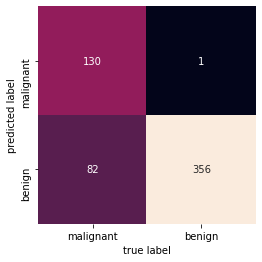

In [7]:
# create confusion matrix using heatmap
mat = confusion_matrix(data.target, labels)
ax = sns.heatmap(mat.T, square=True, annot=True, fmt='d',cbar=False,
                 xticklabels=data.target_names,
                 yticklabels=data.target_names)
ax.set_ylim(2,0,0)
plt.xlabel('true label')
plt.ylabel('predicted label')

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


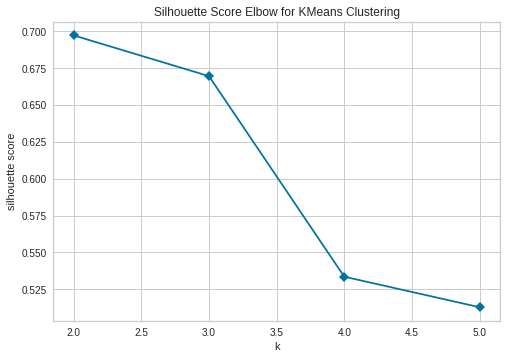

In [8]:
# Find the best number of cluster for clustering using KElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state=0)
visualizer = KElbowVisualizer(model,k=(2,6),metric='silhouette',timings=False)
visualizer.fit(data.data)
visualizer.poof()

In [9]:
# Check siihouette_score which is same as above graph for no.cluster=2
from sklearn.metrics import silhouette_score
print(silhouette_score(data.data,labels))

0.6972646156059464
